In [1]:
import CellScopes as cs

WebIO._IJuliaInit()

Welcome to use CellScopes.jl!


## Part 1. Create dkd2 cs object following CellScopes tutorial at https://github.com/HaojiaWu/CellScopes.jl/tree/main/docs/visium_tutorial

### Step 1. Load visium object

In [2]:
@time dkd2 = cs.read_visium("../../data/FFPE_D2/outs/")

 62.202958 seconds (572.43 M allocations: 21.382 GiB, 6.75% gc time, 21.01% compilation time: 25% of which was recompilation)


VisiumObject in CellScopes.jl


Genes x Cells = 18060 x 3041
Available data:
- rawCount
- metaData
- spmetaData
- imageData
All fields:
- rawCount
- normCount
- scaleCount
- metaData
- spmetaData
- varGene
- dimReduction
- clustData
- imageData


### Step 2. Normalize data

In [3]:
@time dkd2 = cs.normalize_object(dkd2; scale_factor = 10000);

Internal error: stack overflow in type inference of _is_fixed(SparseArrays.SparseVector{Float64, Int64}, SparseArrays.SparseVector{Float64, Int64}, SparseArrays.SparseVector{Float64, Int64}, SparseArrays.SparseVector{Float64, Int64}, SparseArrays.SparseVector{Float64, Int64}, SparseArrays.SparseVector{Float64, Int64}, SparseArrays.SparseVector{Float64, Int64}, SparseArrays.SparseVector{Float64, Int64}, SparseArrays.SparseVector{Float64, Int64}, SparseArrays.SparseVector{Float64, Int64}, SparseArrays.SparseVector{Float64, Int64}, SparseArrays.SparseVector{Float64, Int64}, SparseArrays.SparseVector{Float64, Int64}, SparseArrays.SparseVector{Float64, Int64}, SparseArrays.SparseVector{Float64, Int64}, SparseArrays.SparseVector{Float64, Int64}, SparseArrays.SparseVector{Float64, Int64}, SparseArrays.SparseVector{Float64, Int64}, SparseArrays.SparseVector{Float64, Int64}, SparseArrays.SparseVector{Float64, Int64}, SparseArrays.SparseVector{Float64, Int64}, SparseArrays.SparseVector{Float64, 

 32.188143 seconds (12.89 M allocations: 1.842 GiB, 0.97% gc time, 8.67% compilation time)


### Step 3. Add meta data for predicted annotations

In [4]:
using CSV
using DataFrames

In [5]:
anno_df = CSV.read("../../meta/dkd2_meta.csv", DataFrame);

In [6]:
print(size(anno_df))
first(anno_df, 5)

(3041, 7)

Row,nCount_Spatial,nFeature_Spatial,nCount_SCT,nFeature_SCT,predicted.celltype.score,predicted.celltype,Barcode
,Int64,Int64,Int64,Int64,Float64,String15,String31
1,9784,5118,17286,5717,0.511163,TLS,AACACTTGGCAAGGAA-1
2,15177,6409,17306,6409,0.636089,I-IFTA,AACAGGATTCATAGTT-1
3,17900,6641,18118,6640,0.61917,Inj-T,AACAGGTTATTGCACC-1
4,16517,6954,17419,6954,0.382747,I-IFTA,AACAGGTTCACCGAAG-1
5,7975,4515,17131,5538,0.867863,DKDG,AACAGTCAGGCTCCGC-1


In [7]:
dkd2.metaData.cluster = String.(anno_df[!,"predicted.celltype"]);

In [8]:
dkd2.spmetaData.cluster = String.(anno_df[!,"predicted.celltype"]);

### Step 3. Spatial DimPlot

In [9]:
cell_anno = ["DKDG",
    "SGS",
    "GGS",
    "PT",
    "Inj-T",
    "LH-CD",
    "Cast-T",
    "TLS",
    "I-IFTA",
    "Capsule",
    "Artery-C",
    "Artery-K",
    "Tumor",
    "Other"]
c_map = ["#fff088", 
    "#c3ab00",
    "#615500",
    "#a7c957",
    "#6a994e",
    "#90e0ef",
    "#0096c7",
    "#800080",
    "#A95C68",
    "#BF8F00",
    "#ff5a5f",
    "#AD002A",
    "#495057",
    "#ced4da"]
anno_color=Dict(cell_anno .=> c_map);

In [10]:
using CairoMakie

In [11]:
empty_theme = Theme(
    Axis = (
        backgroundcolor = :transparent,
        leftspinevisible = false,
        rightspinevisible = false,
        bottomspinevisible = false,
        topspinevisible = false,
        xticklabelsvisible = false, 
        yticklabelsvisible = false,
        xgridcolor = :transparent,
        ygridcolor = :transparent,
        xminorticksvisible = false,
        yminorticksvisible = false,
        xticksvisible = false,
        yticksvisible = false,
        xautolimitmargin = (0.0,0.0),
        yautolimitmargin = (0.0,0.0),
    )
);

update_theme!(empty_theme)

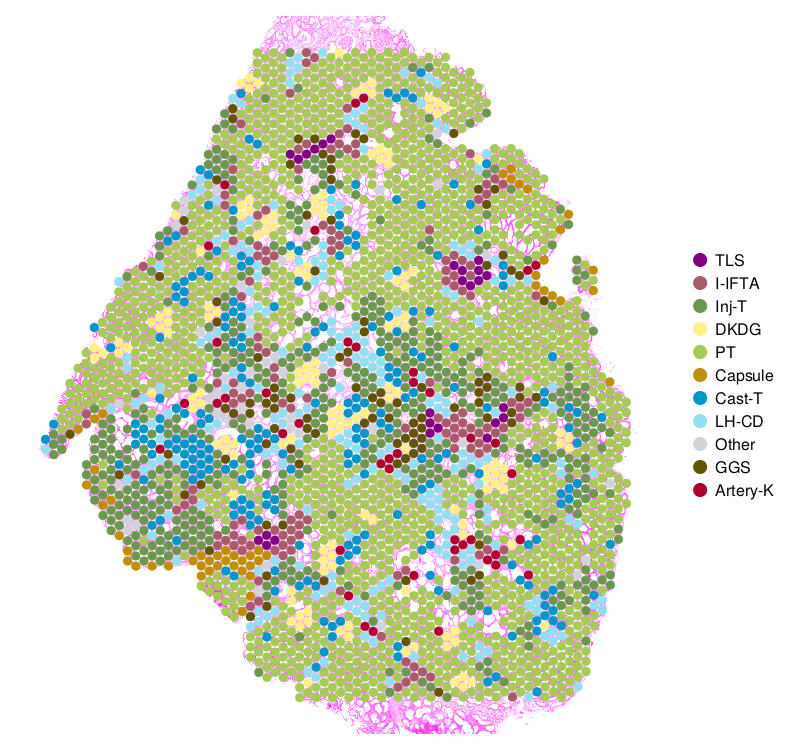

In [12]:
p = cs.sp_dim_plot(dkd2, "cluster"; 
    marker_size = 13, canvas_size = (800,750), adjust_contrast=1.5, adjust_brightness = 0.1,
    do_label=false, alpha=1, img_res="high", anno_color=anno_color);

p

In [13]:
mkpath("../../plots/version_1/main_figures_cs");
mkpath("../../plots/version_1/supp_figures_cs");

In [14]:
save("../../plots/version_1/supp_figures_cs/dkd2_spDimPlot_cs_hires.pdf", p)
save("../../plots/version_1/supp_figures_cs/dkd2_spDimPlot_cs_hires.png", p)

CairoMakie.Screen{IMAGE}


### Step 4. Save as cs object

In [15]:
cs.save(dkd2; filename = "../../processed_data/version_1/dkd2_by_CS.jld2") 

### Step 5. Generate glomeruli subcluster DimPlot

In [16]:
anno_df = CSV.read("../../meta/dkd2_meta_glom_DKDG.csv", DataFrame);

In [17]:
print(size(anno_df))
first(anno_df, 5)

(3041, 3)

Row,Barcode,predicted.celltype,glom_sub
,String31,String15,String7
1,AACACTTGGCAAGGAA-1,TLS,other
2,AACAGGATTCATAGTT-1,I-IFTA,other
3,AACAGGTTATTGCACC-1,Inj-T,other
4,AACAGGTTCACCGAAG-1,I-IFTA,other
5,AACAGTCAGGCTCCGC-1,DKDG,DKDG


In [18]:
dkd2.metaData.cluster = String.(anno_df[!,"glom_sub"]);

In [19]:
dkd2.spmetaData.cluster = String.(anno_df[!,"glom_sub"]);

In [20]:
alpha = 0.01
cell_anno = ["DKDG",
    "SGS",
    "GGS",
    "other"]
c_map = ["#fff088", 
    "#c3ab00",
    "#615500",
    ("#000000",alpha)]
anno_color=Dict(cell_anno .=> c_map);

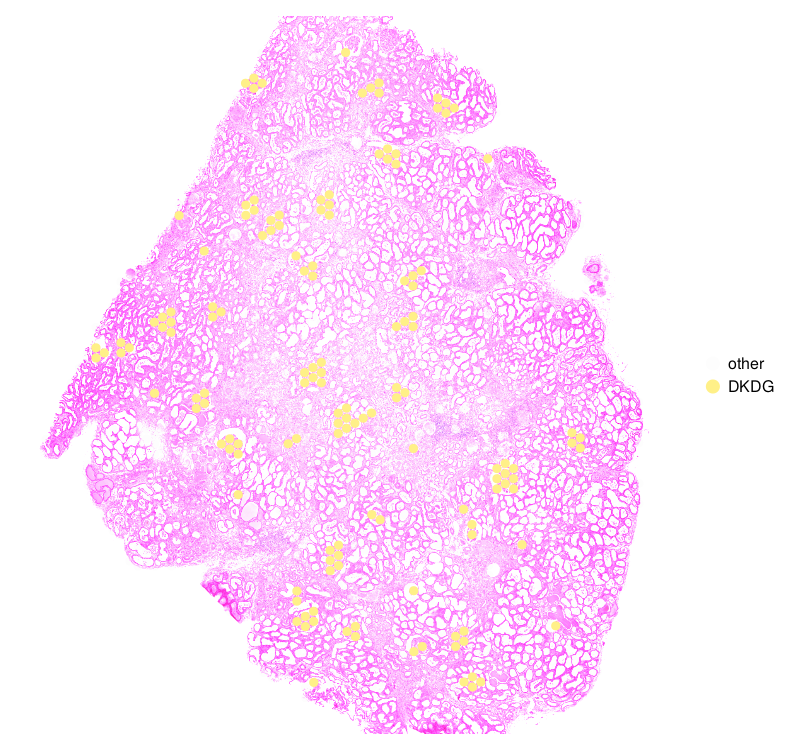

In [21]:
p = cs.sp_dim_plot(dkd2, "cluster"; 
    marker_size = 13, canvas_size = (800,750), adjust_contrast=1.5, adjust_brightness = 0.1,
    do_label=false, alpha=1, img_res="high", anno_color=anno_color);

p

In [22]:
save("../../plots/version_1/supp_figures_cs/dkd2_spDimPlot_cs_DKDG.pdf", p);
save("../../plots/version_1/supp_figures_cs/dkd2_spDimPlot_cs_DKDG.png", p);

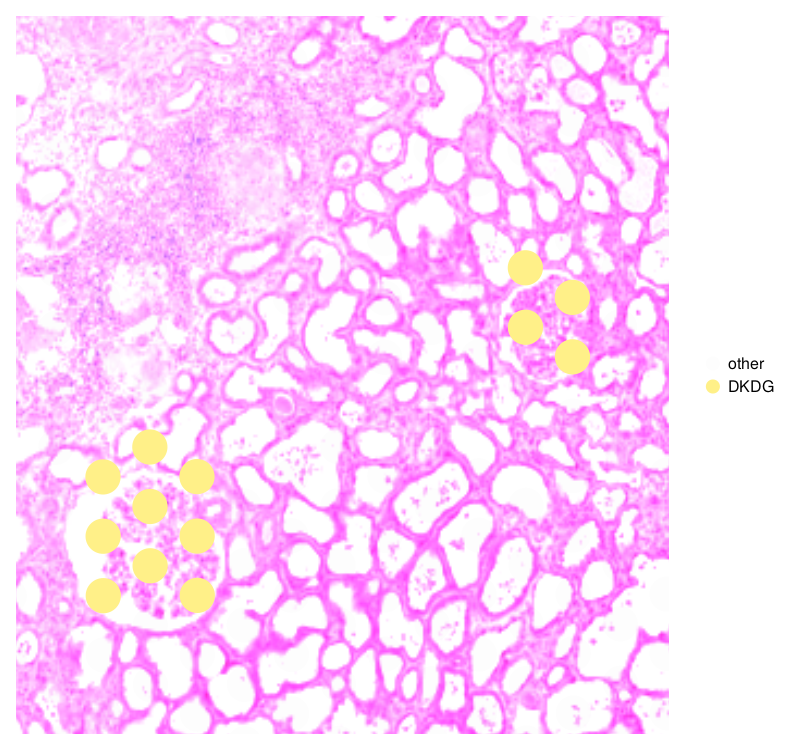

In [23]:
p = cs.sp_dim_plot(dkd2, "cluster"; 
    marker_size = 50, canvas_size = (800,750), adjust_contrast=1.5, adjust_brightness = 0.1,
    do_label=false, alpha=1, img_res="high", anno_color=anno_color,
    x_lims=(1150, 1450),
    y_lims=(650, 950));

p

In [24]:
save("../../plots/version_1/supp_figures_cs/dkd2_spDimPlot_cs_DKDG_zoom.pdf", p);
save("../../plots/version_1/supp_figures_cs/dkd2_spDimPlot_cs_DKDG_zoom.png", p);

### Step 6. Generate zoom-in glomeruli region plat

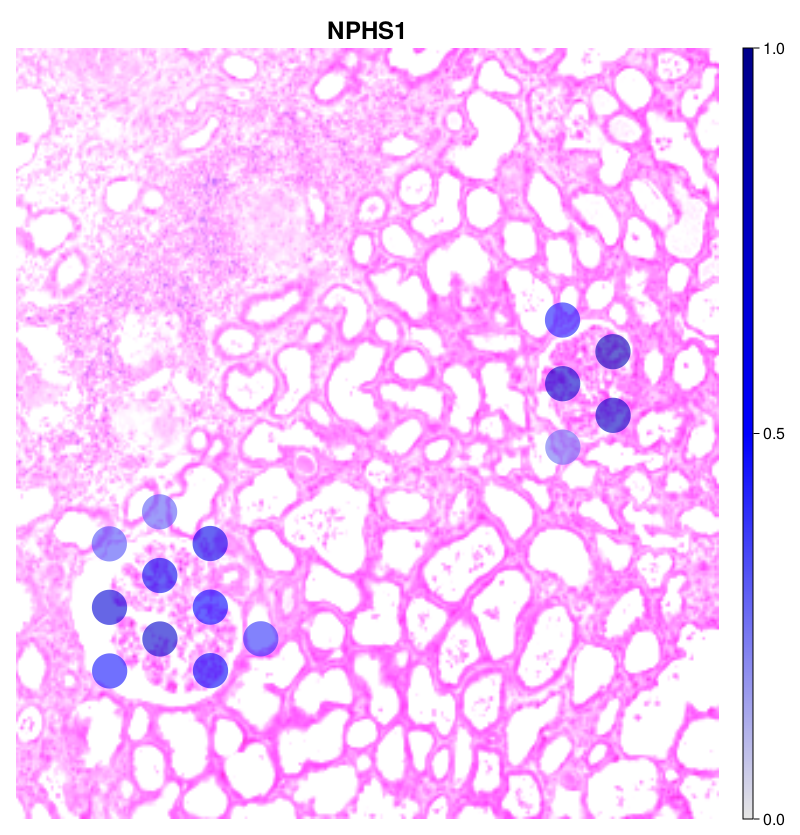

In [29]:
p = cs.sp_feature_plot(dkd2, ["NPHS1"]; 
    marker_size = 50, color_keys=["gray90", "blue" ,"darkblue"], 
    adjust_contrast=1.5, adjust_brightness = 0.1, scale=true, alpha=[0,.6],clip=0.2,
    height=835, width=800,img_res="high",  
    x_lims=(1150, 1450),
    y_lims=(650, 950))

save("../../plots/version_1/supp_figures_cs/dkd2_spFeaturePlot_cs_NPHS1_zoom.png", p);
save("../../plots/version_1/supp_figures_cs/dkd2_spFeaturePlot_cs_NPHS1_zoom.pdf", p);
save("../../plots/version_1/supp_figures_cs/dkd2_spFeaturePlot_cs_NPHS1_zoom.svg", p);
p